In [ ]:
!git clone https://github.com/FeiWang96/GTR.git

Cloning into 'GTR'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 50 (delta 7), reused 38 (delta 3), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [ ]:
%cd GTR/data/webquerytable/

/content/GTR/data/webquerytable


In [ ]:
!cat WebQueryTable_Dataset.zip.00* > WebQueryTable.zip

In [ ]:
!unzip WebQueryTable.zip

Archive:  WebQueryTable.zip
   creating: WebQueryTable_Dataset/
  inflating: WebQueryTable_Dataset/Readme.txt  
  inflating: WebQueryTable_Dataset/WQT.dataset.query-table.tsv  
  inflating: WebQueryTable_Dataset/WQT.dataset.query.tsv  
  inflating: WebQueryTable_Dataset/WQT.dataset.table.tsv  


In [ ]:
!python preprocess.py

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
qrel = pd.read_csv('trec_qrel.txt', sep="\t", header=None)
qrel = qrel.drop(columns = [1])
qrel.columns = ['query_id', 'table_id', 'true_label']
qrel

,query_id,table_id,true_label
0,web10001,web13790,0
1,web10001,web20308,0
2,web10001,web15962,0
3,web10001,web7349,0
4,web10001,web5178,0
...,...,...,...
103156,web9999,web57207,0
103157,web9999,web119638,0
103158,web9999,web119641,0
103159,web9999,web42432,0


In [ ]:
#load prediction
rank = pd.read_csv('trec_rank.txt', sep="\t", header=None)
rank = rank.drop(columns = [1, 5])
rank

,0,2,3,4
0,web10001,web13790,1,2.882835
1,web10001,web20308,2,2.882831
2,web10001,web15962,3,2.882831
3,web10001,web7349,4,2.882831
4,web10001,web5178,5,2.882824
...,...,...,...,...
103156,web9999,web57207,46,-25.807079
103157,web9999,web119638,47,-25.808182
103158,web9999,web119641,48,-25.808613
103159,web9999,web42432,49,-25.810057


In [ ]:
#check if two table have exactly same order
for i in range(len(qrel.table_id)):
  if qrel.table_id[i] != rank[2][i]:
    print(i)

In [ ]:
#merge prediction into qrel
qrel['prediction'] = rank[4]
qrel

,query_id,table_id,true_label,prediction
0,web10001,web13790,0,2.882835
1,web10001,web20308,0,2.882831
2,web10001,web15962,0,2.882831
3,web10001,web7349,0,2.882831
4,web10001,web5178,0,2.882824
...,...,...,...,...
103156,web9999,web57207,0,-25.807079
103157,web9999,web119638,0,-25.808182
103158,web9999,web119641,0,-25.808613
103159,web9999,web42432,0,-25.810057


In [ ]:
#load tables
import json
 
# Opening JSON file
f = open('tables.json',)
 
# returns JSON object as
# a dictionary
tables = json.load(f)

In [ ]:
#load all quries
queries_table = pd.read_csv('train_query.txt', sep="\t", header=None)
queries = {}
for i in range(queries_table.shape[0]):
  queries[queries_table[0][i]] = queries_table[1][i]

queries_table = pd.read_csv('test_query.txt', sep="\t", header=None)
for i in range(queries_table.shape[0]):
  queries[queries_table[0][i]] = queries_table[1][i]

queries_table = pd.read_csv('dev_query.txt', sep="\t", header=None)
for i in range(queries_table.shape[0]):
  queries[queries_table[0][i]] = queries_table[1][i]

In [ ]:
exist_queries = qrel.query_id.unique()

In [ ]:
# For each query, say there are n labeled 1 tables
# Top k means the percatage of these n labels are ranked in top k * n 

top1_index = []
test_result = {}
for qid in exist_queries:
  query_df = qrel[qrel['query_id'] == qid]
  label_list = np.array(qrel[qrel['query_id'] == qid].true_label)
  total_1 = sum(query_df.true_label == 1)
  top1_index += list(query_df.index[:total_1])
  if total_1 == 0:
    continue
  else:
    print(qid, queries[qid])
    top1_2 = 100* sum(label_list[:total_1] == 1)/total_1
    top2_2 = 100* sum(label_list[:total_1*2] == 1)/total_1
    top5_2 = 100* sum(label_list[:total_1*5] == 1)/total_1
    top10_2 = 100* sum(label_list[:total_1*10] == 1)/total_1
    print("Total: ", total_1 ,"Top1: ", "{:.2f}%".format(top1_2) ,"Top2:", "{:.2f}%".format(top2_2) ,"Top5: ", "{:.2f}%".format(top5_2) ,"Top10: ", "{:.2f}%".format(top10_2))
    test_result[qid] = (total_1, top1_2, top2_2, top5_2, top10_2)

web10001 dunkin donuts donuts price
Total:  1 Top1:  0.00% Top2: 0.00% Top5:  0.00% Top10:  0.00%
web10003 emirates visa fees
Total:  1 Top1:  100.00% Top2: 100.00% Top5:  100.00% Top10:  100.00%
web10018 derby city council tax bands
Total:  1 Top1:  100.00% Top2: 100.00% Top5:  100.00% Top10:  100.00%
web10019 derby postcodes and areas
Total:  1 Top1:  100.00% Top2: 100.00% Top5:  100.00% Top10:  100.00%
web10020 diabetic medications uk
Total:  1 Top1:  0.00% Top2: 100.00% Top5:  100.00% Top10:  100.00%
web1003 a levels ucas points
Total:  1 Top1:  0.00% Top2: 0.00% Top5:  0.00% Top10:  100.00%
web10031 easter's date 2016
Total:  1 Top1:  100.00% Top2: 100.00% Top5:  100.00% Top10:  100.00%
web10072 etf dividends
Total:  1 Top1:  100.00% Top2: 100.00% Top5:  100.00% Top10:  100.00%
web10080 bangladesh premier league records
Total:  1 Top1:  100.00% Top2: 100.00% Top5:  100.00% Top10:  100.00%
web10091 bletchley college term dates
Total:  1 Top1:  0.00% Top2: 0.00% Top5:  0.00% Top10: 

In [ ]:
total = 0.0
p1 = 0.0
for k, v in test_result.items():
  total += 1
  if v[1] == 100:
    p1 += 1
p1/total

0.6304558680892337

In [ ]:
negative_query = []
for k, v in test_result.items():
  if v[4] == 0:
     df = qrel[qrel['query_id'] == k]
     prediction_difference = float(df.loc[df['true_label'] == 1]['prediction']) - float(df.iloc[0]['prediction'])
     negative_query.append((k, queries[k], prediction_difference, float(df.iloc[0]['prediction'])))

In [ ]:
# worst performance queries
sorted(negative_query, key = lambda x: x[2])[:10]

[('web18988',
  'texas approved drivers safety course',
  -19.04249882698059,
  -3.8396499156951904),
 ('web15198',
  'ithaca college sat scores',
  -16.82276427745819,
  -1.6024714708328247),
 ('web19660',
  'internet explorer 8 end of support date',
  -15.69842004776001,
  -7.8293395042419425),
 ('web18319',
  'state bank of india savings account interest rate',
  -15.592320919036865,
  -4.657721042633057),
 ('web13598',
  'stat holiday in march',
  -14.431660652160645,
  -9.797625541687012),
 ('web7842', '100 g butter to cups', -14.066967487335205, -5.097745418548584),
 ('web7583',
  'indian government debt',
  -13.00925049185753,
  -0.13463035225868225),
 ('web663', 'cat normal blood sugar', -12.87912893295288, -4.561298847198486),
 ('web3569',
  'hydrogen chloride chemical name',
  -10.915696620941164,
  -4.2178168296813965),
 ('web4484', 'doris day bra size', -10.733147621154785, -8.672120094299316)]

'texas approved drivers safety course': high prediction cases related with texas drivers licence but not course

'ithaca college sat scores': high prediction cases related with thaca College, sat scores; true table has university sat score as two column, and ithaca college and its corresponding score as an entry. error, columns can represent A of B relation

'internet explorer 8 end of support date': similar to 2, column "A of B", information hides in table entry

'state bank of india savings account interest rate': abbreviation SBI

'stat holiday in march': March

'100 g butter to cups': actual answer all recipes, but select butter related

'cat normal blood sugar': actual answer: blood sugar --> Blood Glucose --> BG

'hydrogen chloride chemical name': does not understand hydrogen chloride

'doris day bra size': A of B: height, bra size .. of name


In [ ]:
qrel[qrel['query_id'] == 'web15198'].iloc[:10]

,query_id,table_id,true_label,prediction
28431,web15198,web2864,0,-1.602471
28432,web15198,web11467,0,-16.686773
28433,web15198,web14913,0,-17.228876
28434,web15198,web175,0,-18.424858
28435,web15198,web10417,0,-18.424931
28436,web15198,web1665,0,-18.424978
28437,web15198,web978,0,-18.425068
28438,web15198,web18810,0,-18.425074
28439,web15198,web16073,0,-18.425074
28440,web15198,web15806,0,-18.425102


In [ ]:
tables['web15198']

{'caption': 'Colleges Average SAT &amp; ACT Test Scores - PowerScore',
 'subcaption': '',
 'table_array': [['College', 'SAT Math', 'SAT Reading'],
  ['Indiana University- Bloomington', '510-620', '540-600'],
  ['Indiana University of Pennsylvania', '450-540', '440-530'],
  ['Iowa State University', '530-680', '460-620'],
  ['Ithaca College', '530-640', '520-630']]}

In [ ]:
tables['web2864']

{'caption': 'Ithaca College - Forbes',
 'subcaption': '',
 'table_array': [['Enrollment by Race/Ethnicity',
   '',
   'Graduation Rate by Race/Ethnicity'],
  ['Native Hawaiian/Pacific Islander',
   'N/A',
   'Native Hawaiian/Pacific Islander'],
  ['Black or African American', '4.67%', 'Black or African American'],
  ['Hispanic/Latino', '7.31%', 'Hispanic/Latino'],
  ['White', '69.06%', 'White']]}

In [ ]:
tables['web8130']

{'caption': "Is the United States the World 's Most Indebted Country ? Not Even Close",
 'subcaption': '',
 'table_array': [['Country', 'Debt Per Person', 'Debt to GDP'],
  ['Japan', '$99,725 ', '242.30%'],
  ['Singapore', '$56,980 ', '106.20%'],
  ['Ireland', '$60,356 ', '121%'],
  ['Italy', '$46,757 ', '133.10%']]}

In [ ]:
tables['web10442']

{'caption': 'TxDPS - Driver License Fees - Texas Department of Public Safety',
 'subcaption': '',
 'table_array': [['License type', '*Fee', 'Information'],
  ['Under 18: new', '$16 ', 'Expires on your 18th birthday'],
  ['Age 18 to 84: new', '$25 ', 'Expires after six years (on your birthday)'],
  ['Age 18 to 84: renewal',
   '$25 ',
   'Expires six years after previous expiration date'],
  ['Age 85 and older: new',
   '$9 ',
   'Expires after two years (on your birthday)']]}

In [ ]:
rank_by_qlen = dict()
for qid in exist_queries:
  q_length = len(queries[qid].split(" "))
  rank = list(qrel[qrel['query_id'] == qid].true_label).index(1) + 1
  if not(q_length in rank_by_qlen):
    rank_by_qlen[q_length] = [rank]
  else:
    rank_by_qlen[q_length].append(rank)

In [ ]:
avgrank_by_qlen = []
q_len = []
avg_rank = []
for k in rank_by_qlen:
  avgrank_by_qlen.append((k, sum(rank_by_qlen[k])/len(rank_by_qlen[k]), len(rank_by_qlen[k])))
  if len(rank_by_qlen[k]) > 10:
    q_len.append(k)
    avg_rank.append(sum(rank_by_qlen[k])/len(rank_by_qlen[k]))
  print(avgrank_by_qlen[-1])

(4, 2.6927374301675977, 537)
(3, 2.5185185185185186, 459)
(5, 2.6876574307304786, 397)
(2, 2.2054794520547945, 146)
(6, 2.7714285714285714, 210)
(11, 2.0, 9)
(8, 2.4, 75)
(10, 2.8214285714285716, 28)
(9, 3.2181818181818183, 55)
(7, 3.0153846153846153, 130)
(12, 3.375, 8)
(1, 2.0, 1)
(14, 1.0, 2)
(13, 1.0, 2)
(15, 2.0, 1)
(16, 1.0, 1)
(20, 4.0, 1)


In [ ]:
q_len = np.array(q_len)
avg_rank = np.array(avg_rank)
np.corrcoef(q_len, avg_rank)

array([[1.        , 0.63945408],
       [0.63945408, 1.        ]])

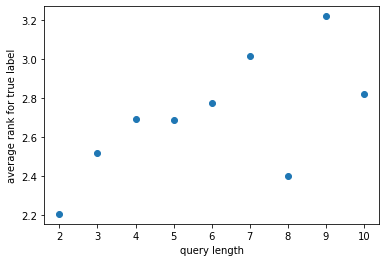

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(q_len, avg_rank)
plt.xlabel('query length')
plt.ylabel('average rank for true label')
plt.show()

In [ ]:
total_q_len = []
total_avg_rank = []
for l in rank_by_qlen:
  for r in rank_by_qlen[l]:
    total_q_len.append(l)
    total_avg_rank.append(r)

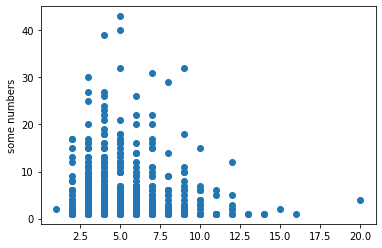

In [ ]:
plt.scatter(total_q_len, total_avg_rank)
plt.ylabel('some numbers')
plt.show()

In [ ]:
def get_table_size(table_id):
  data = tables[table_id]['table_array']
  if len(data) == 0:
    return 0
  return len(data) * len(data[0])

In [ ]:
rank_by_tabsize = dict()
for qid in exist_queries:
  tab_size = get_table_size(qid)
  rank = list(qrel[qrel['query_id'] == qid].true_label).index(1)
  if not(tab_size in rank_by_tabsize):
    rank_by_tabsize[tab_size] = [rank]
  else:
    rank_by_tabsize[tab_size].append(rank)

web12555
web15623
web18266


In [ ]:
avgrank_by_tabsize = []
table_size = []
avg_rank = []
for k in rank_by_tabsize:
  avgrank_by_tabsize.append((k, sum(rank_by_tabsize[k])/len(rank_by_tabsize[k]), len(rank_by_tabsize[k])))
  if len(rank_by_tabsize[k]) > 10:
    table_size.append(k)
    avg_rank.append(sum(rank_by_tabsize[k])/len(rank_by_tabsize[k]))
  print(avgrank_by_tabsize[-1])

(15, 1.915085817524842, 1107)
(12, 0.9470588235294117, 170)
(10, 1.3973214285714286, 448)
(9, 2.7674418604651163, 43)
(8, 1.6147540983606556, 122)
(6, 1.2247191011235956, 89)
(4, 0.8, 35)
(2, 0.6875, 32)
(20, 3.5, 2)
(21, 0.2, 5)
(16, 0.0, 1)
(25, 0.0, 3)
(14, 1.4, 5)


In [ ]:
all_table_size = []
for qid in queries:
  all_table_size.append(get_table_size(qid))
all_table_size = np.array(all_table_size)

In [ ]:
from scipy import stats
stats.describe(all_table_size)

DescribeResult(nobs=21157, minmax=(2, 25), mean=12.513210757668856, variance=10.889844847477386, skewness=-0.8005731172120815, kurtosis=0.5619097732990301)